## Planckian distribution of target photons

In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import m_e, m_p, e, h, c, k_B
from astropy.coordinates import Distance
import matplotlib.pyplot as plt
from IPython.display import Image
# import agnpy classes
from agnpy.spectra import PowerLaw, BrokenPowerLaw, LogParabola, ExpCutoffPowerLaw
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
from agnpy.compton import SynchrotronSelfCompton
from agnpy.utils.plot import plot_sed, load_mpl_rc

from agnpy.utils.math import axes_reshaper, gamma_e_to_integrate
from agnpy.utils.conversion import nu_to_epsilon_prime, B_to_cgs, lambda_c

load_mpl_rc()

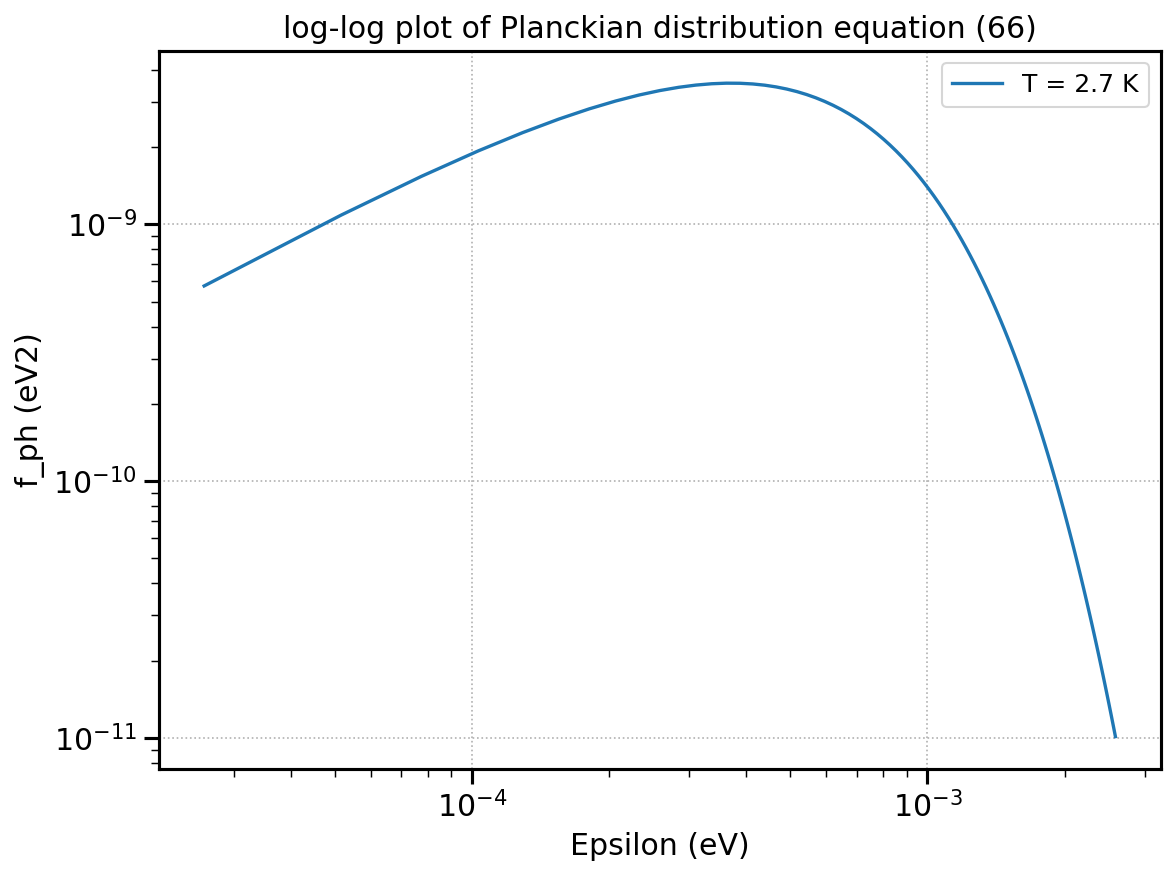

In [6]:
T_cmb = 2.7 * u.K

T_array = np.linspace(0.1, 10, 100) * u.K
eps = 3*k_B*T_array
eps = eps.to(u.eV)
#print(eps)

kBT = (k_B*T_cmb).to(u.eV)

def Planckian_dist(array):
    return (1/np.pi**2)*(array**2 / (np.exp(array/kBT)-1))

f_ph = Planckian_dist(eps)
plt.loglog(eps, f_ph, label=f"T = {T_cmb}")
plt.title(f"log-log plot of Planckian distribution equation (66)")
plt.xlabel(f"Epsilon ({eps.unit})")
plt.ylabel(f"f_ph ({f_ph.unit})")
plt.legend()
plt.show()

## Plotting (62)

In [7]:
def omega(eps, theta):
    omega = gamma_p * eps * (1 - np.cos(theta))
    return omega

gamma_p = 10

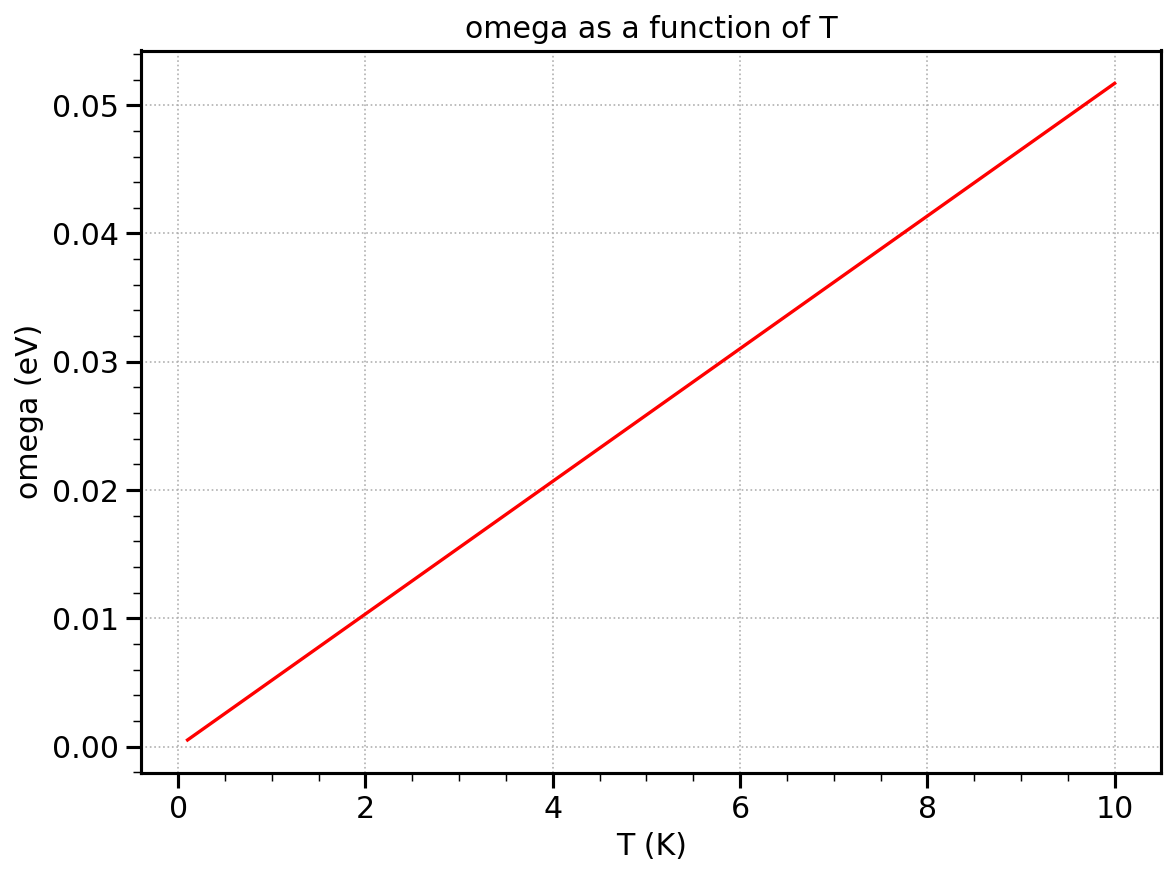

In [8]:
# Omega as a function of T

T_array = np.linspace(0.1, 10, 100) * u.K
eps = 3*k_B*T_array
eps = eps.to(u.eV)

theta_fixed = np.pi # Head-on collision

omega_T = omega(eps, theta_fixed)
plt.plot(T_array, omega_T, color="r")
plt.title("omega as a function of T")
plt.xlabel(f"T ({T_array.unit})")
plt.ylabel(f"omega ({omega_T.unit})")
plt.show()

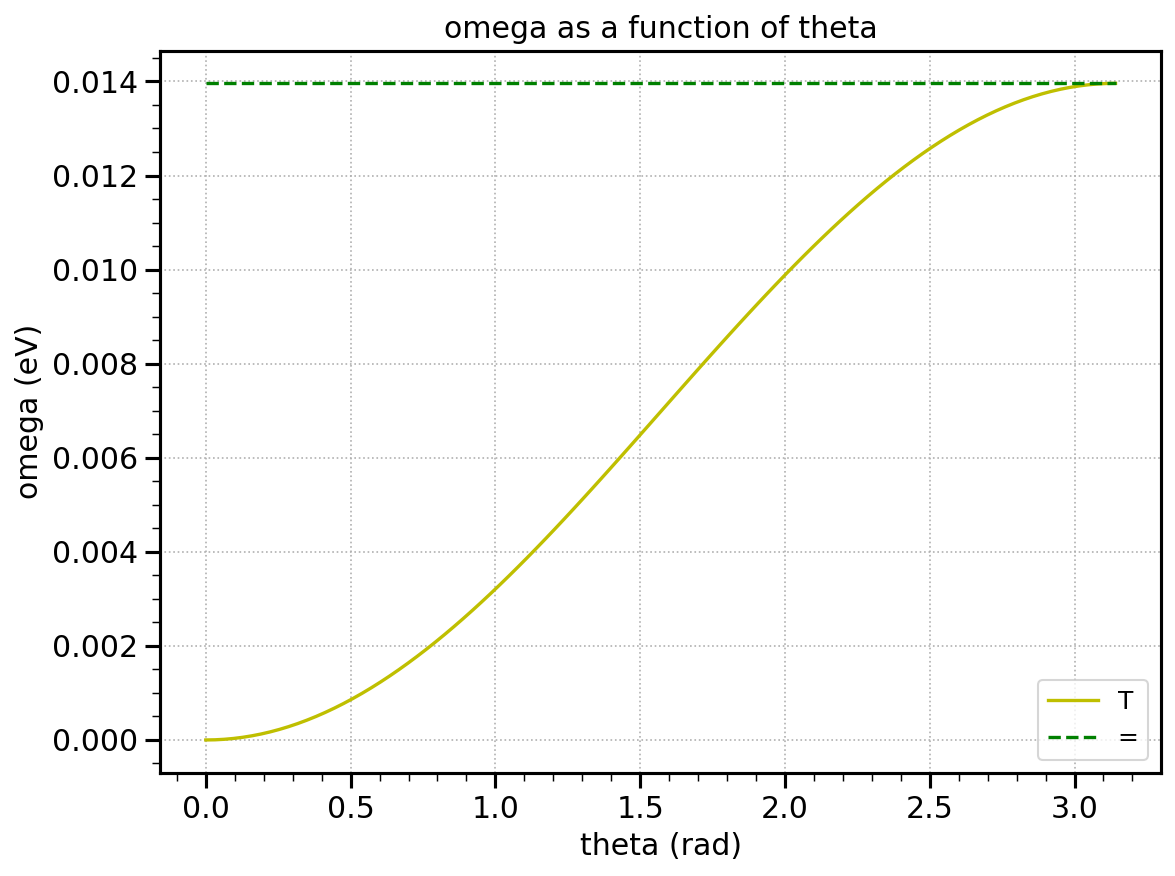

In [9]:
# Omega as a function of theta

eps_fixed = 3*k_B*T_cmb
eps_fixed = eps_fixed.to(u.eV)

theta = np.linspace(0, np.pi, 100)

omega_limit = 2*eps_fixed*gamma_p*np.ones(len(theta))

omega_theta = omega(eps_fixed, theta)
plt.plot(theta, omega_theta, "y-", label="omega")
plt.plot(theta, omega_limit, "g--", label="omega_limit")
plt.title("omega as a function of theta")
plt.xlabel(f"theta (rad)")
plt.ylabel(f"omega ({omega_theta.unit})")
plt.legend("T=2.7K")
plt.show()

## Verify (66)

In [10]:
T_cmb = 2.7 * u.K
kBTcmb = (k_B*T_cmb).to(u.eV)

def Planckian_dist(eps):
    f = np.pi**(-2) * (eps**2)/(np.e**(eps/kBTcmb) - 1)
    return f

def second_to_last(arr): # Function adding last element again, useful to get dimensions right
    arr = np.append(arr, arr[-1])
    return arr

[2.58519998e-05 5.17039996e-05 7.75559994e-05 1.03407999e-04
 1.29259999e-04 1.55111999e-04 1.80963999e-04 2.06815998e-04
 2.32667998e-04 2.58519998e-04 2.84371998e-04 3.10223997e-04
 3.36075997e-04 3.61927997e-04 3.87779997e-04 4.13631997e-04
 4.39483996e-04 4.65335996e-04 4.91187996e-04 5.17039996e-04
 5.42891996e-04 5.68743995e-04 5.94595995e-04 6.20447995e-04
 6.46299995e-04 6.72151994e-04 6.98003994e-04 7.23855994e-04
 7.49707994e-04 7.75559994e-04 8.01411993e-04 8.27263993e-04
 8.53115993e-04 8.78967993e-04 9.04819993e-04 9.30671992e-04
 9.56523992e-04 9.82375992e-04 1.00822799e-03 1.03407999e-03
 1.05993199e-03 1.08578399e-03 1.11163599e-03 1.13748799e-03
 1.16333999e-03 1.18919199e-03 1.21504399e-03 1.24089599e-03
 1.26674799e-03 1.29259999e-03 1.31845199e-03 1.34430399e-03
 1.37015599e-03 1.39600799e-03 1.42185999e-03 1.44771199e-03
 1.47356399e-03 1.49941599e-03 1.52526799e-03 1.55111999e-03
 1.57697199e-03 1.60282399e-03 1.62867599e-03 1.65452799e-03
 1.68037999e-03 1.706231

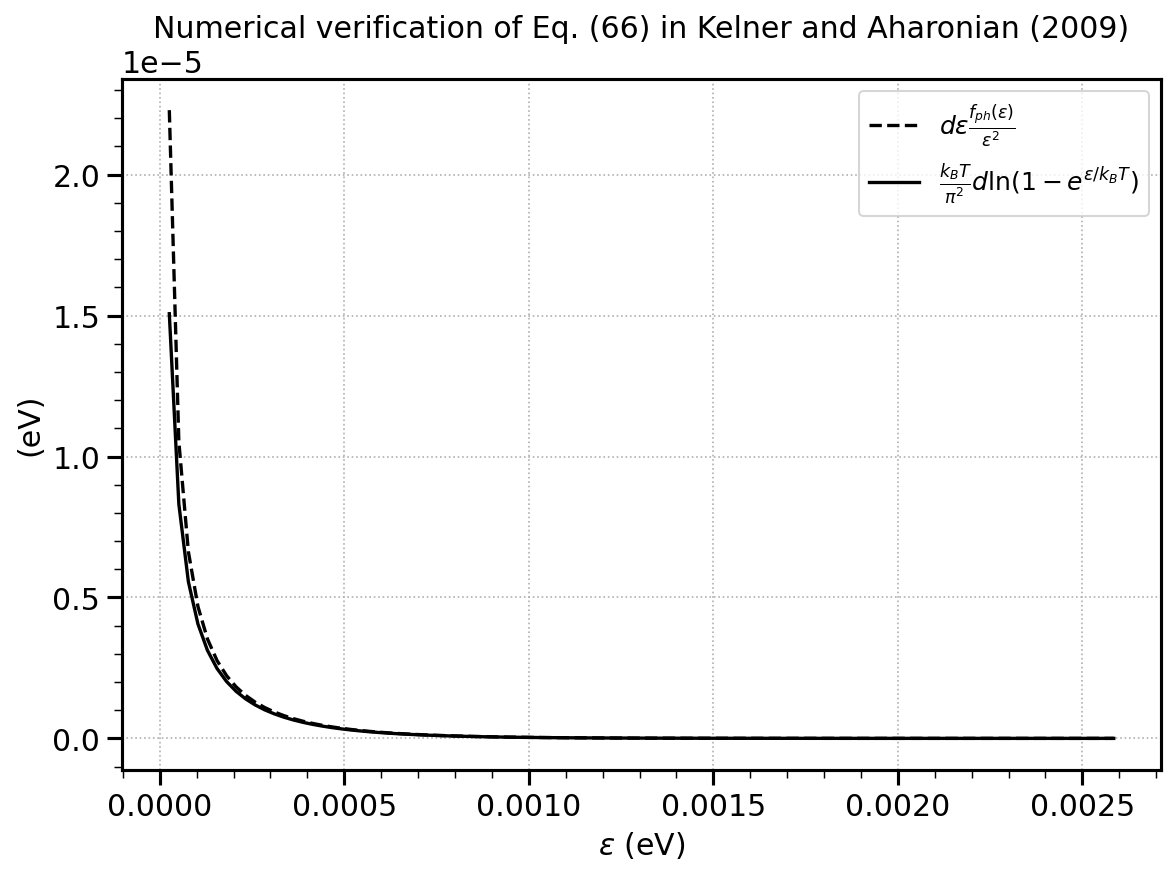

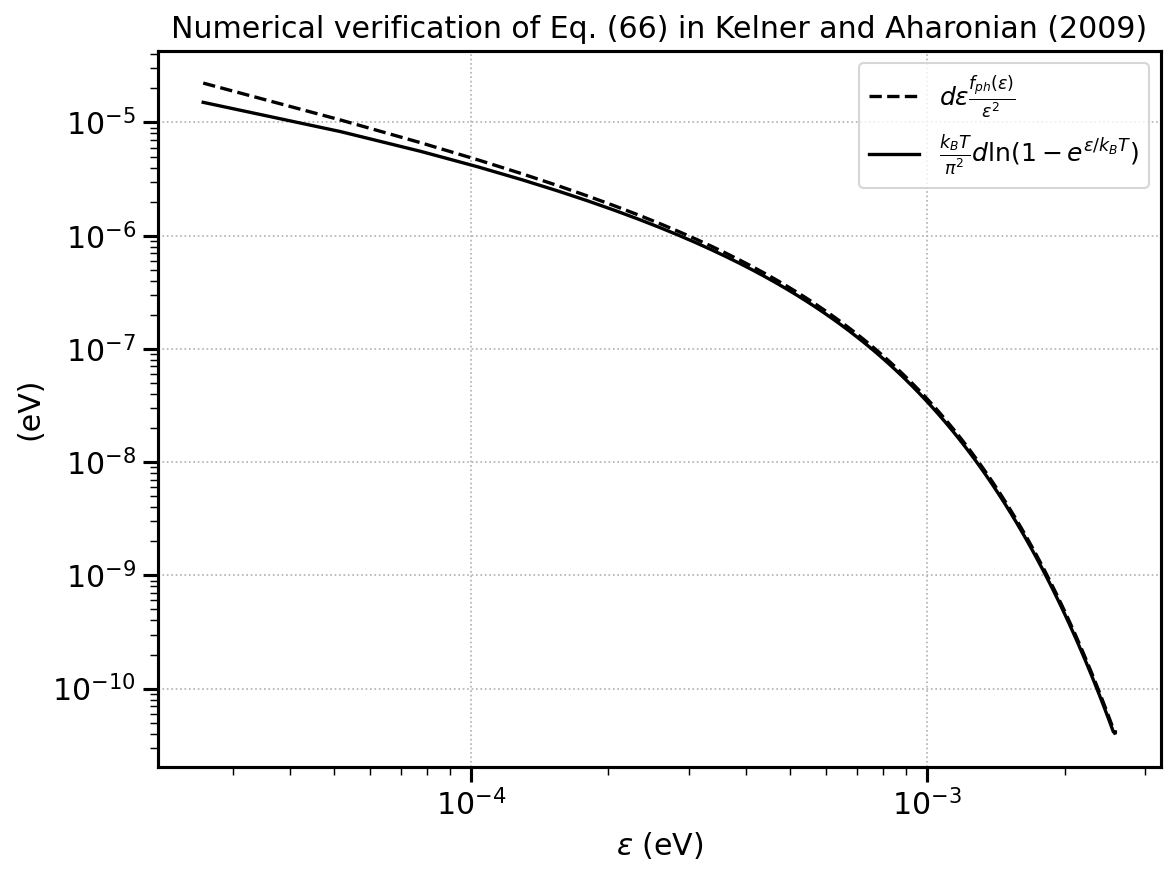

In [12]:
# Comparing equation (66) in Kelner and Aharonian (2009)

T_array = np.linspace(0.1, 10, 100) * u.K

eps_array = 3*k_B*T_array
eps_array = eps_array.to(u.eV)
print(eps_array)

# Left side of equation (66)

deps_array = second_to_last(eps_array[1::] - eps_array[0:-1])

f_ph = Planckian_dist(eps_array)

left_side = deps_array * f_ph * eps_array**-2

# Right side of equation (66)

log_array = np.log(1 - np.e**(-eps_array/kBTcmb))

dlog_array = second_to_last(log_array[1::] - log_array[0:-1])

right_side = (kBTcmb)/(np.pi**2) * dlog_array

# Comparison between the two sides

plt.plot(eps_array, left_side, "k--", label=r"$d\epsilon \frac{f_{ph}(\epsilon)}{\epsilon^2}$")
plt.plot(eps_array, right_side, "k", label=r"$\frac{k_BT}{\pi^2} d \ln(1-e^{\epsilon/k_BT})$")
plt.title("Numerical verification of Eq. (66) in Kelner and Aharonian (2009)")
plt.ylabel(fr"({right_side.unit})")
plt.xlabel(fr"$\epsilon$ ({eps_array.unit})")
plt.legend()
plt.show()

plt.loglog(eps_array, left_side, "k--", label=r"$d\epsilon \frac{f_{ph}(\epsilon)}{\epsilon^2}$")
plt.loglog(eps_array, right_side, "k", label=r"$\frac{k_BT}{\pi^2} d \ln(1-e^{\epsilon/k_BT})$")
plt.title("Numerical verification of Eq. (66) in Kelner and Aharonian (2009)")
plt.ylabel(fr"({right_side.unit})")
plt.xlabel(fr"$\epsilon$ ({eps_array.unit})")
plt.legend()
plt.show()

In [ ]:
plt.plot(eps_array, abs(left_side-right_side), "k")
plt.title("Error of Eq. (66) in Kelner and Aharonian (2009)")
plt.ylabel(f"({right_side.unit})")
plt.xlabel(f"epsilon ({eps_array.unit})")
plt.show()